In [1]:
# Import libraries
import time
import random
import matplotlib.pyplot as plt
import platform
import psutil


In [8]:

# Define the sorting algorithms
def insertion_sort(array):
    """
    Sorts a list using the insertion sort algorithm.

    Args:
      array: A list of comparable elements.

    Returns:
      The sorted list.
    """
    for i in range(1, len(array)):
      # The current element to be inserted
      key = array[i]
      j = i - 1
      # Move elements greater than key one position ahead
      while j >= 0 and key < array[j]:
        array[j + 1] = array[j]
        j -= 1
      # Insert key at its correct position
      array[j + 1] = key
    return array

def selection_sort(array):
    """
    Sorts a list using the selection sort algorithm.

    Args:
        array: A list of comparable elements.

    Returns:
        The sorted list.
    """
    n = len(array)
    for i in range(n):
      # Index of the minimum element in the unsorted part
      min_idx = i
      for j in range(i + 1, n):
        if array[j] < array[min_idx]:
          # Update min_idx if a smaller element is found
          min_idx = j
      # Swap the found minimum element with the first element of the unsorted part
      array[i], array[min_idx] = array[min_idx], array[i]
    return array

def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
      # Flag to check if any swaps occurred in a pass
      swapped = False
      for j in range(0, n - i - 1):
        if arr[j] > arr[j + 1]:
          # Swap adjacent elements if they are in wrong order
          arr[j], arr[j + 1] = arr[j + 1], arr[j]
          swapped = True
      if not swapped:
        # If no swaps occurred, the list is sorted
        break
    return arr

# Benchmark function
def benchmark_sort(sort_function, input_sizes):
  # Initialize a list to store times.
    time_taken = []
    # Iterate through provided input sizes
    for n in input_sizes.keys():
      # Create a new random input array from n size. Select anything between 0 - n*100 integers
      arr = input_sizes[n]
      # Log the start time
      start_time = time.time()
      # Sort the array using the provided sorting function
      sort_function(arr.copy())
      # Log the end time
      end_time = time.time()
      # Calculate end time and store the time taken for sorting in list
      time_taken.append(end_time - start_time)
    return time_taken




In [11]:
# Input sizes to benchmark
# Start with a list with one value.
input_sizes = {5: random.sample(range(5 * 100), 5)}
current_value = 5
# Increase the next size exponentially after each value untill 10,000
while current_value < 20000:
  current_value *= 2
  # Add the arrays w.r.t their keys
  input_sizes[current_value] = random.sample(range(current_value * 100), current_value)

print("Various input sizes for Arrays. \n", input_sizes)




Various input sizes for Arrays. 
 {5: [121, 110, 462, 227, 323], 10: [359, 130, 790, 727, 737, 416, 712, 738, 84, 315], 20: [1955, 785, 1113, 183, 271, 1766, 1366, 1473, 445, 738, 1537, 1351, 796, 1933, 1833, 715, 1719, 1055, 440, 145], 40: [2958, 3551, 3632, 500, 3758, 32, 3438, 778, 213, 3821, 2433, 3732, 1836, 1280, 1510, 3780, 3729, 2078, 408, 2061, 2324, 2940, 3638, 2924, 1762, 2767, 2622, 1096, 152, 524, 347, 1196, 2499, 1274, 308, 3911, 2452, 503, 817, 1201], 80: [1483, 1692, 5281, 4757, 5485, 5283, 2787, 2878, 5203, 7292, 3465, 2236, 3109, 753, 5132, 2641, 5598, 4096, 1970, 5951, 3214, 1278, 7535, 2737, 3092, 2003, 2180, 617, 4419, 6468, 6763, 1733, 1751, 6037, 6060, 6703, 5916, 6863, 7036, 2636, 886, 5172, 2870, 4512, 6911, 6690, 4201, 4893, 3676, 3817, 2671, 4602, 5682, 6431, 5458, 4532, 5845, 34, 5609, 1339, 5642, 2465, 2654, 5492, 3837, 5607, 826, 6189, 18, 3534, 4343, 4909, 161, 884, 2827, 5675, 2458, 7775, 5311, 123], 160: [15034, 1988, 5516, 14446, 373, 3763, 13219, 7351

In [12]:
# Benchmarking the sorting algorithms
insertion_times = benchmark_sort(insertion_sort, input_sizes)
selection_times = benchmark_sort(selection_sort, input_sizes)
bubble_times = benchmark_sort(bubble_sort, input_sizes)

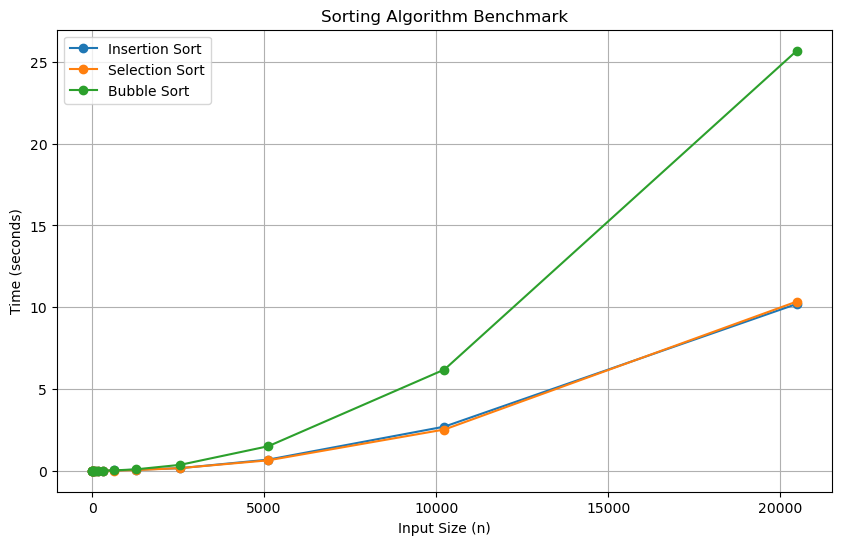

In [14]:
# Plotting the benchmark results
plt.figure(figsize=(10, 6))
plt.plot(input_sizes.keys(), insertion_times, label='Insertion Sort', marker='o')
plt.plot(input_sizes.keys(), selection_times, label='Selection Sort', marker='o')
plt.plot(input_sizes.keys(), bubble_times, label='Bubble Sort', marker='o')
plt.xlabel('Input Size (n)')
plt.ylabel('Time (seconds)')
plt.title('Sorting Algorithm Benchmark')
plt.legend()
plt.grid(True)
plt.savefig("Various Sorting Algorithm Benchmark.png")
plt.show()



In [15]:
# System specifications
print("System Information:")
print(f"Processor: {platform.processor()}")
print(f"RAM: {psutil.virtual_memory().total / (1024 ** 3):.2f} GB")


System Information:
Processor: Intel64 Family 6 Model 186 Stepping 2, GenuineIntel
RAM: 15.69 GB
